# ***Online Shoppers Intention***

Making predictive recommendations using; univariate analysis, bivariate analysis clustering.

**Introduction**

Activity Focus: analyze online shoppers' purchasing intentions.

Consumer shopping on the internet is growing year by year. However, the conversion rates have remained more or less the same. For example, most of us browse through e-commerce websites such as Amazon, perhaps adding items to a wish list or even an online shopping cart, only to end up buying nothing. From this common truth comes the need for tools and solutions that can customize promotions and advertisements for online shoppers and improve this conversion.

we will be analyzing various factors that affect a purchaser's decision.


In [ ]:
#Libraries
#You can then proceed with the imports
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Loading online_shoppers_intention dataset
df = pd.read_csv("/content/online_shoppers_intention.csv")

In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

We can see that the data is clean

In [ ]:
# Checking missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There are no missing values

**Exploratory Data Analysis**

Using visualization techniques, implement Exploratory Data Analysis (EDA) to investigate the data to find hidden patterns and outliers, often by plotting them in

Use summary statistics to uncover underlying data structures and test any hypotheses.

We can split exploratory data analytics into three parts:      
• Univariate analysis

• Bivariate analysis

• Linear relationships

**Univariate Analysis**

Univariate analysis is the analysis of each feature (column of a DataFrame)  to uncover the pattern or 
distribution of the data. Lets start by looking at the following features in some more detail:

• Revenue column

• Visitor type

• Traffic type

• Region

• Weekend-wise distribution

• Browser and operating system

• Administrative page

• Information page

• Special day


**Baseline Conversion Rate from the Revenue**

This feature simply refers to how many of the online shopping sessions ended in a purchase.
 
Using Seaborn: visualize the countplot of the Revenue column.

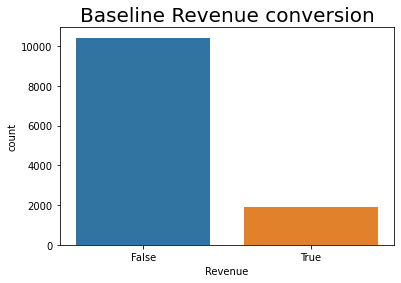

In [ ]:
%matplotlib inline
sns.countplot(df['Revenue'])
plt.title('Baseline Revenue conversion', fontsize = 20)
plt.show()


Hypothesis 1: We are not effective at converting vists to sales: WEAKNESS.

From the preceding graph, we can see that False has a higher number count than True.

In order to get the exact value, use the .value_counts() function to get the value counts of each subcategory:

In [ ]:
print(df['Revenue'].value_counts())# Pandas
print()
print(df['Revenue'].value_counts(normalize=True)) # converts the results in percentages

False    10422
True      1908
Name: Revenue, dtype: int64

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


**Visitor-Wise Distribution**

Analyze the distribution of visitors to the website. 

Task: Determine which visitor type is most frequent—whether this is new visitors, returning visitors, or
any other category.

First, we draw a countplot using seaborn:

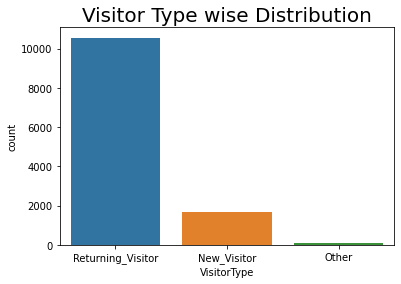

In [ ]:
%matplotlib inline
sns.countplot(df['VisitorType'])
plt.title('Visitor Type wise Distribution', fontsize = 20)
plt.show()

Hypothesis 2: We are good at retaining visitors to our site :  STRENGTH

In [ ]:
#Next, calculate the exact number of visitors belonging to each type:
 
print(df['VisitorType'].value_counts())
print()
print(df['VisitorType'].value_counts(normalize=True))

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64


Insight: we can see that the number of returning customers is higher than that of new visitors. 
This is good news as it means we have been successful in attracting customers back to our website

**Traffic-Wise Distribution**

consider the distribution of traffic. 

Find out how the visitors visit our page to determine what amount of site traffic is accounted 
for by direct visitors (meaning they enter the URL into the browser) and how much is generated 
through other mediums, such as blogs or advertisements.

Plot a countplot for the traffic type to visulize this:

 

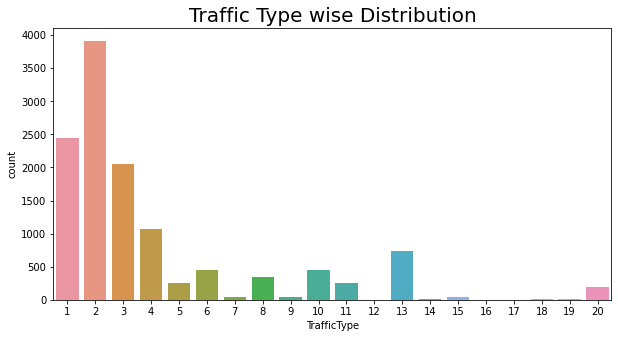

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(df['TrafficType'])
plt.title('Traffic Type wise Distribution', fontsize = 20)
plt.show()

Insight:
    
From the preceding graph, we can see that traffic type 2 has the highest count. 

To get the exact value, normalize the count to get the percentage value for each source:


In [ ]:
print(df['TrafficType'].value_counts(normalize=True))

2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64


From the preceding information, we can see that sources 2, 1, 3, and 4 account for
the majority of our web traffic.

**Weekend distribution of the customer**

Analyzing the Distribution of Customers Session on the Website

In this exercise, you will consider the distribution of customers over days of the week
to determine whether customers are more active on weekends or weekdays.

The following steps will help you to complete this exercise:

Plot a countplot using seaborn for the weekend column of the DataFrame:


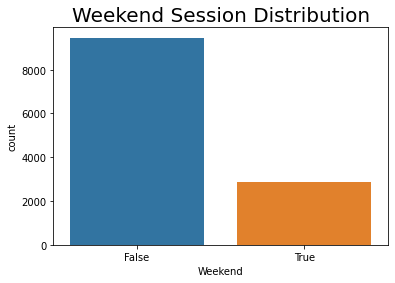

In [ ]:
sns.countplot(df['Weekend'])
plt.title('Weekend Session Distribution', fontsize = 20)
plt.show()

In [ ]:
print(df['Weekend'].value_counts())
print()
print(df['Weekend'].value_counts(normalize=True))

False    9462
True     2868
Name: Weekend, dtype: int64

False    0.767397
True     0.232603
Name: Weekend, dtype: float64


From the count of the False subcategory, we can see that more visitors visit during
weekdays than weekend days.

**Region-Wise Distribution**

The objective of this analysis is to find out which region has the highest number of
visitors visiting our website.


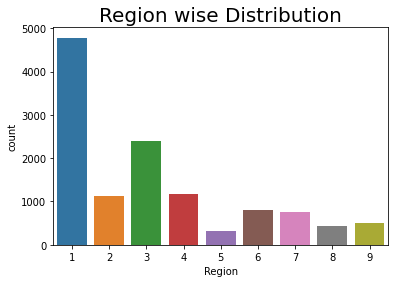

In [ ]:
# Plot the countplot for the Region column:
#plt.figure(figsize = (15,8))
sns.countplot(df['Region'])
plt.title('Region wise Distribution', fontsize = 20)
plt.show()

In [ ]:
print(df['Region'].value_counts())
print()
print(df['Region'].value_counts(normalize=True))

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: Region, dtype: float64


From the preceding graph, the numbers 1, 2, and so on represent the different
regions that the data is sourced from. 
We can see that Region 1 has the highest number of visitors visiting our website.

**Analyzing the Browser Distribution of Customers**

We will be checking the distribution of browsers used by customers to determine which type of browser and OS is used by our visitors. This information will allow us to configure our website so that we can make it more responsive and user-friendly.
1. Draw a countplot using the Browser column of the DataFrame:
2. Use the resulting plot to determine which browser type is the most popular
among visitors

 

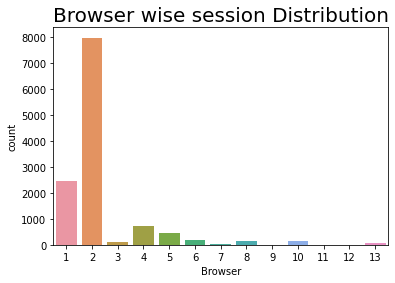

In [ ]:
sns.countplot(df['Browser'])
plt.title('Browser wise session Distribution', fontsize = 20)
plt.show()

From the preceding graph, we can see that browser type 2 contributes the most to the website traffic.

In [ ]:
print(df['Browser'].value_counts())
print()
print(df['Browser'].value_counts(normalize=True))


2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: Browser, dtype: float64


**Operating system Distribution of Customers**

The analysis will determine the OS type which contributes most to web traffic

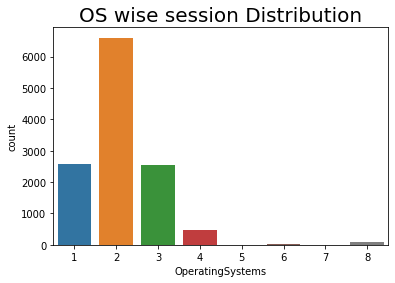

In [ ]:
sns.countplot(df['OperatingSystems'])
plt.title('OS wise session Distribution', fontsize = 20)
plt.show()

From the preceding graph, we can see that OS type 2 contributes the most to the
website traffic.


In [ ]:
print(df['OperatingSystems'].value_counts())
print()
print(df['OperatingSystems'].value_counts(normalize=True))

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64


**Administrative Pageview Distribution**

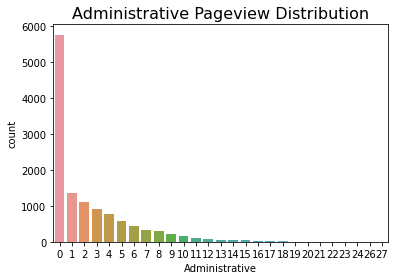

In [ ]:
sns.countplot(df['Administrative'])
plt.title('Administrative Pageview Distribution', fontsize = 16)
plt.show()

We can see from the preceding plot that users tend to visit page 0 the most often.

**Information Pageview Distribution**

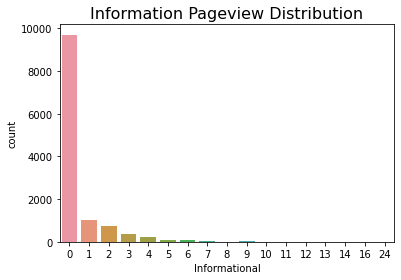

In [ ]:
# Plot the countplot for the Informational page:
sns.countplot(df['Informational'])
plt.title('Information Pageview Distribution', fontsize = 16)
plt.show()

From the preceding graph, we can see that Information page 0 has the highest
number of visitors.

In order to get the exact count of customers visiting each information page, 
we will use the .value_count() function:

In [ ]:
print(df['Informational'].value_counts(normalize=True))

0     0.786618
1     0.084428
2     0.059043
3     0.030819
4     0.018005
5     0.008029
6     0.006326
7     0.002920
9     0.001217
8     0.001135
10    0.000568
12    0.000406
14    0.000162
16    0.000081
11    0.000081
24    0.000081
13    0.000081
Name: Informational, dtype: float64


79% of users are visiting pages 0 and 1.

**Special Day Session Distribution**

We will be looking at the number of visitors during a special day. 
We would like to know whether special days impact on the number
of users visiting our website.
                                            
Let's plot the countplot for special days:

The output will be as follows:

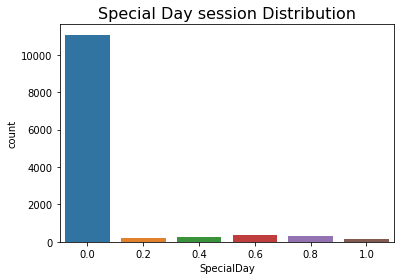

In [ ]:
sns.countplot(df['SpecialDay'])
plt.title('Special Day session Distribution', fontsize = 16)
plt.show()

In [ ]:
print(df['SpecialDay'].value_counts(normalize=True))

0.0    0.898540
0.6    0.028467
0.8    0.026358
0.4    0.019708
0.2    0.014436
1.0    0.012490
Name: SpecialDay, dtype: float64


From the preceding screenshot, we can see that 89.8% of visitors visited during a non-special day (special day subcategory 0), showing that there is no affinity of web traffic toward special days.

**Bivariate Analysis**

Bivariate analysis is performed between two variables to look at their relationship. We will be performing bivariate analysis between the revenue column and the following categories: • Visitor type • Traffic type • Region • Browser type • Operating system • Month • Special day

Now, let's analyze each feature through its relationship to the revenue

**Revenue Versus Visitor Type**

First, we consider the relationship between revenue and visitor type.

We will be plotting a categorical plot between Revenue and VisitorType. 

The categorical plot gives you the number of users in each subcategory, and whether each
culminated in a purchase. 

The plot will define those users who did make a purchase as True, and those who did not as False:

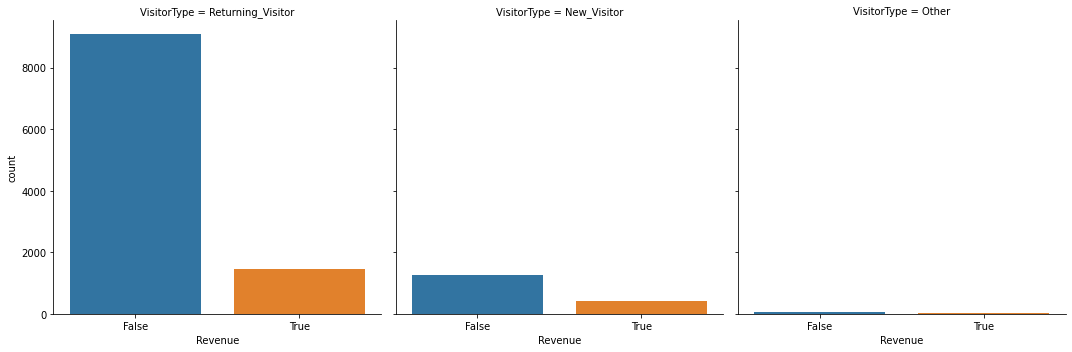

In [ ]:
g = sns.catplot("Revenue", col="VisitorType", col_wrap=3, data=df,kind="count", height=5, aspect=1)
plt.show()

There are more revenue conversions happening for returning customers than new customers.

**Revenue Versus Traffic Type**

We consider the relationship between Revenue and TrafficType.
We will be plotting a countplot between revenue and traffic type. The countplot
gives you the number of users in each traffic type, and whether or not they made a
purchase (shown as True or False in the plot):

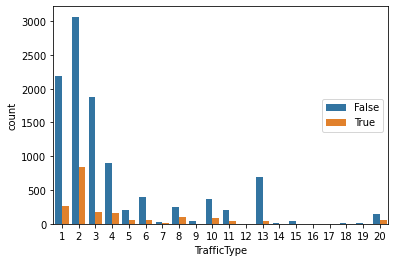

In [ ]:
sns.countplot(x="TrafficType", hue="Revenue", data=df)
plt.legend(loc='right')
plt.show()

From the preceding plot, we can see that more revenue conversion happens for web traffic generated from source 2.

**Revenue Versus Region**

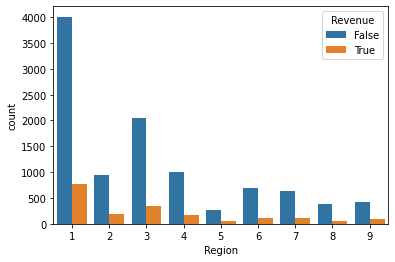

In [ ]:
sns.countplot(x="Region", hue="Revenue", data=df)
plt.show()

From the plot, we can see that region 1 accounts for most sales, and region 3 the second most.

**Revenue Versus Browser Type**

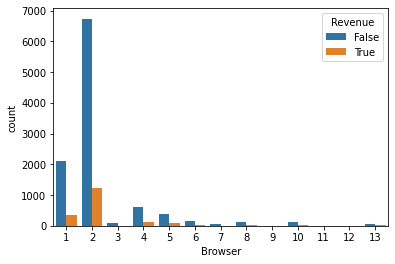

In [ ]:
sns.countplot(x="Browser", hue="Revenue", data=df)
plt.show()

More revenue-generating transactions were performed from Browser 2.

**Revenue Versus Operating Systems Type**

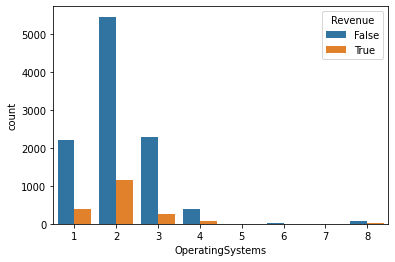

In [ ]:
sns.countplot(x="OperatingSystems", hue="Revenue", data=df)
plt.show()

More revenue-generating transactions happened with OS 2 than the other types.

**Revenue Versus Month**

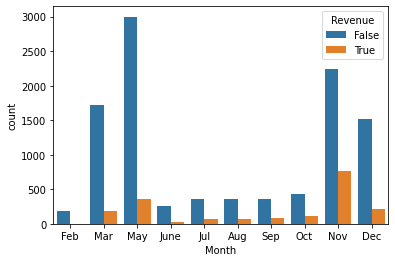

In [ ]:
sns.countplot(x="Month", hue="Revenue", data=df,order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

Website visitors may be high in May, but we can observe from the bar plot
that a greater number of purchases were made in the month of November. 

**Linear relationship**

We will be studying the linear relationship between the following variables:

• Bounce rate versus exit rate

• Page value versus bounce rate

• Page value versus exit rate

• Impact of administration page views and administrative pageview duration on revenue

• Impact of information page views and information pageview duration on revenue


**Bounce rate versus Exit rate**


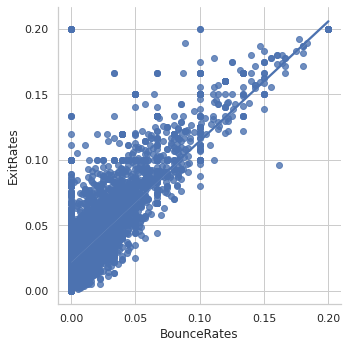

In [ ]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="BounceRates", y="ExitRates", data=df)

There is a positive correlation between the bounce rate and the exit
rate. With the increase in bounce rate, the exit rate of the page increases.

**Page Value versus Bounce Rate**

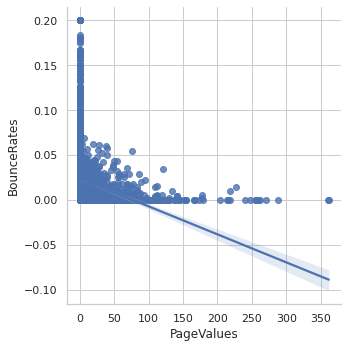

In [ ]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="BounceRates" , data=df)

As we can see in the plot, there is a negative correlation between page value and bounce rate.

As the page value increases, the bounce rate decreases.

To increase the probability of a customer purchasing with us, we need to improve the page value—perhaps by making the content more engaging or by using images to convey the information.

**Page Value versus Exit Rate**

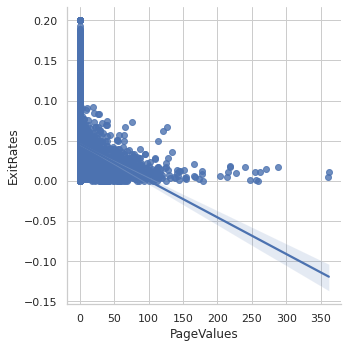

In [ ]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="PageValues", y="ExitRates" , data=df)

As we can see in the preceding plot, there is a negative correlation between page value and exit rate. Web pages with a better page value have a lower exit rate.

**Impact of Administration Page Views and Administrative Pageview Duration on Revenue**

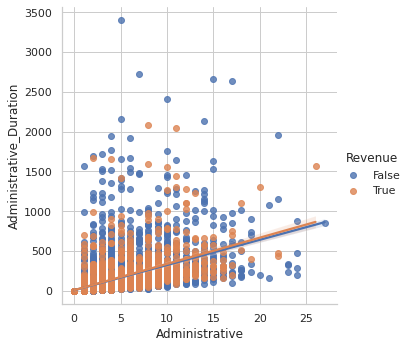

In [ ]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="Administrative", y="Administrative_Duration",\
                hue='Revenue', data=df)

From the preceding plot, we can infer that administrative-related pageviews and the administrative-related pageview duration are positively correlated. When there is an increase in the number of administrative pageviews, the administrative pageview duration also increases.

**Impact of Information Page Views and Information Pageview Duration on Revenue**

We want to look at the relationship between the number of views of the information pages and the amount of time spent on them.

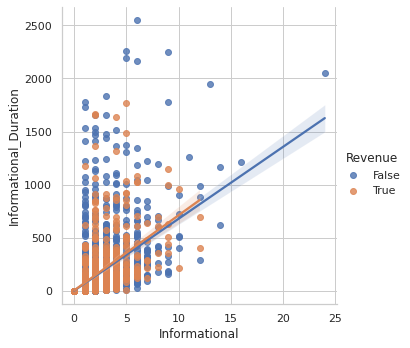

In [ ]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="Informational", y="Informational_Duration",\
                hue='Revenue', data=df)

From the preceding plot, we can conclude the following:
    
• Information page views and information pageview duration are positively correlated. 
With an increase in the number of information pageviews, the information pageview duration also increases.

• Customers who have made online purchases visited fewer numbers of informational pages. 

This implies that informational pageviews don't have much effect on revenue generation.

**Clustering**

We will focus on k-means clustering method

We will be using the elbow method to find the optimum number of clusters. 



**Performing K-means Clustering for Informational Duration versus Bounce Rate**

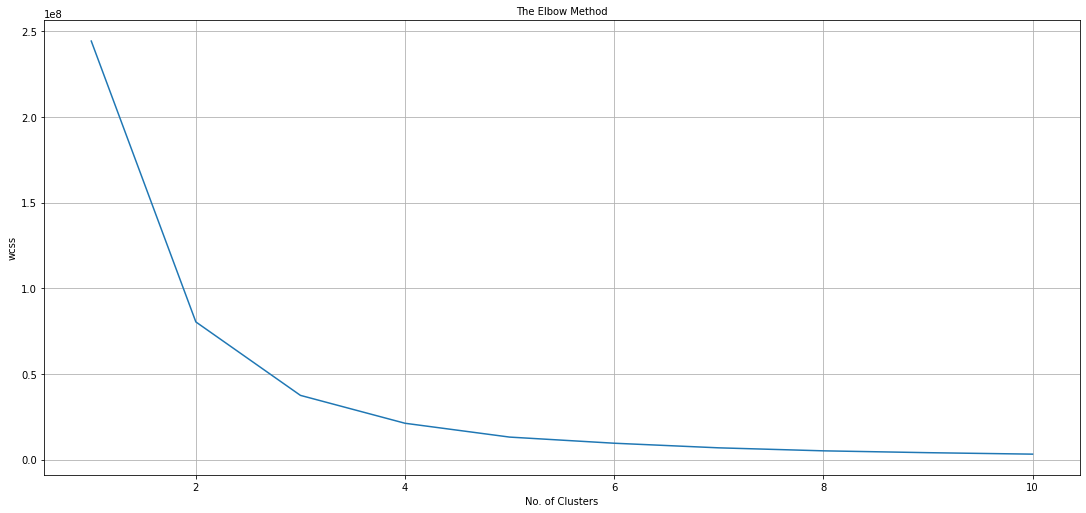

In [ ]:
#1. Select the columns and assign them to a variable called x:
    
x = df.iloc[:, [3, 6]].values

#2. Run the k-means algorithm for different values of k. km is the k-means clustering algorithm:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)
    
    #3. Fit the k-means algorithm to the x variable we defined in the preceding steps:
    km.fit(x)
    labels = km.labels_

    #4. Append the inertia value calculated using Kmeans to wcss:
    wcss.append(km.inertia_)

#5. Plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 10)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

From the preceding elbow graph, we can infer that k=2 is the optimum value for clustering.

In [ ]:
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

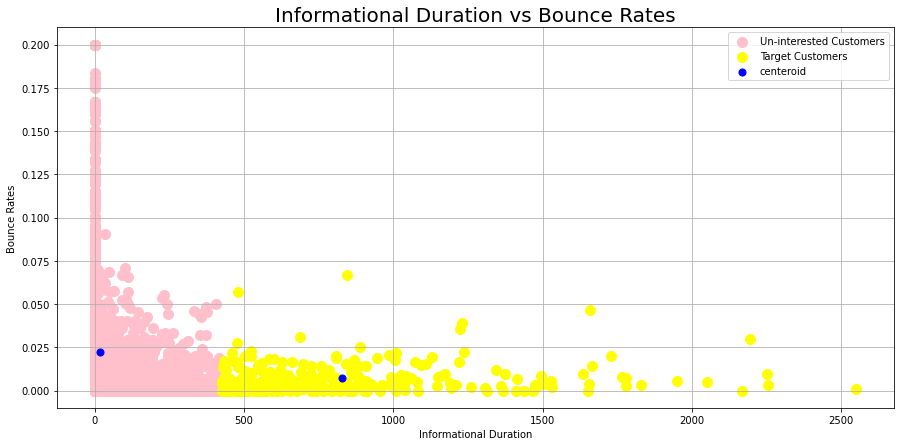

In [ ]:
''' Plot the scatter plot, assign the color pink for uninterested customers (in which Revenue is False), 
yellow for target customers (in which Revenue is True), and blue for the centroid of the cluster '''
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

From the preceding graph, we can see that our target customers spend around 850 seconds 
on average on the Information page.

**Performing K-means Clustering for Informational Duration versus Exit Rate**
​

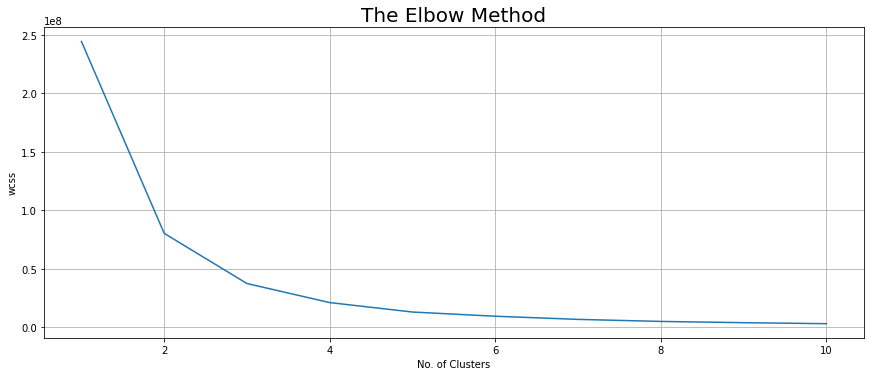

In [ ]:
'''We are now going to perform clustering between the information pageview duration
and exit rate columns. Select the columns and assign them to a variable called x:'''

x = df.iloc[:, [3, 7]].values
wcss = []
for i in range(1, 11):
    #Km is the k-means clustering algorithm. Run the k-means algorithm for different values of k (1-10):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', \
                tol = 0.001)
    #Now, fit the k-means algorithm to the x variable we defined previously:
    km.fit(x)
    labels = km.labels_
    #Now, append the inertia value we calculated using Kmeans to wcss:
    wcss.append(km.inertia_)
    
#Now, plot the value of wcss with the value of k:
plt.rcParams['figure.figsize'] = (12, 5)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

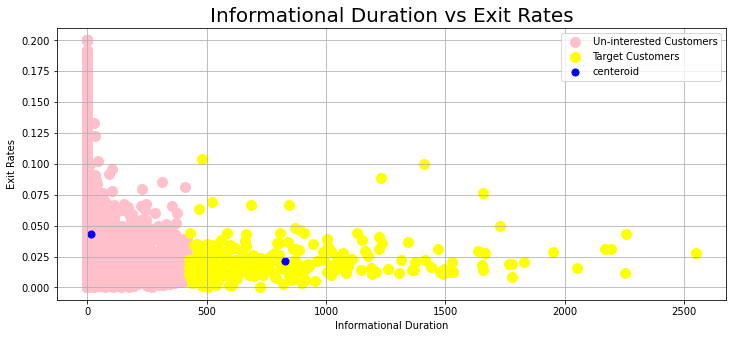

In [ ]:
'''From the preceding elbow graph, we can see that k=2 is the optimum value for clustering. 
Now, let's run k-means clustering with k=2:'''

km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')


'''We plot the scatter plot between the exit rate and information pageview duration.
To make the graph more readable, we'll assign the color pink for uninterested customers (where Revenue is False), 
yellow for target customers (where Revenue is True), and blue for the centroid of the cluster:'''
    
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('Informational Duration vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

From the preceding cluster, we can infer that our target customers spend around 850
seconds more on average than the other customers before exiting.

**Summary**

1. Hypothesis 1: We are not effective at converting vists to sales: WEAKNESS.

2. Hypothesis 2: We can see that the number of returning customers is higher than that of new visitors. We have been successful in attracting customers back to our website : STRENGTH

3. We can infer that TrafficType sources: 2, 1, 3, and 4 accounts for the majority of our web traffic, which 2 is the highest.

4. We can infer that more visitors visited during weekdays than weekend days.

5. We can see that Region 1 has the highest number of visitors visiting the website.

6. Browser type 2 contributed the most to the website traffic.

7. Operation type 2 contributes the most to the website traffic.

8. On the pageview, users tend to visit page 0 the most. 79% of users visited page 0 and 1 for information

9. We can see that 89% of visitors visited during Special day subcategory 0, showing that there is no affinity of web traffic toward special days.


Bivariate analysis shows that;

1. There are more revenue conversions happening for returning customers than new customers.

2. We can infer that more revenue conversion happens for web traffic generated from traffictype source 2.

3. Region 1 accounts for most sales and Region 3 the second most.

4. Most revenue generating transactions were performed from Browser 2.

5. Operating system type 2 had most revenue generating transaction.

6. The Month of May had the highest website visitors but we can observe that a greater number of purchases were made in the month of November.


Linear relationship

1. There is a positive correlation betwen the bounce rate and the exit rate. With the increase in bounce rate, the exit rate of the page increases.

2. There is a negative correlation between page value and bounce rate. As the page value increases, the bounce rate decreases.

3. There is a negative correlation between page value and exit rate. Web pages with a better page value have a lower exit rate.

4. We can infer that administrative-related pageviews and the administrative-related pageview duration are positively correlated. When there is an increase in the number of administrative pageviews, the administrative pageview duration also increases.

5. We can see that information pageviews and information pageview duration are positively correlated. With an increase in the number of information pageviews, the information pageview duration also increases.


K-means clustering method

Elbow method was used to find the optimum number of clusters.

Performing k-means clustering for informational duration versus bounce rate, infers that our target customers spend around 850 seconds on average on the information page.

Performing k-means clustering for informational duration versus exit rate, infers that our target customers spend around 850 seconds more on average than the other customers.